In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
discrib = pd.read_excel(r"B:\Project\Classification\Data Dictionary.xls")
discrib
#discrib['Unnamed: 1'][11]

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


In [43]:
data = pd.read_csv(r"B:\Project\Classification\cs-training.csv")
data.head(5).T

,0,1,2,3,4
Unnamed: 0,1.000000,2.000000,3.000000,4.00000,5.000000
SeriousDlqin2yrs,1.000000,0.000000,0.000000,0.00000,0.000000
RevolvingUtilizationOfUnsecuredLines,0.766127,0.957151,0.658180,0.23381,0.907239
age,45.000000,40.000000,38.000000,30.00000,49.000000
NumberOfTime30-59DaysPastDueNotWorse,2.000000,0.000000,1.000000,0.00000,1.000000
DebtRatio,0.802982,0.121876,0.085113,0.03605,0.024926
MonthlyIncome,9120.000000,2600.000000,3042.000000,3300.00000,63588.000000
NumberOfOpenCreditLinesAndLoans,13.000000,4.000000,2.000000,5.00000,7.000000
NumberOfTimes90DaysLate,0.000000,0.000000,1.000000,0.00000,0.000000
NumberRealEstateLoansOrLines,6.000000,0.000000,0.000000,0.00000,1.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [16]:
data.shape

(150000, 12)

In [17]:
data.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

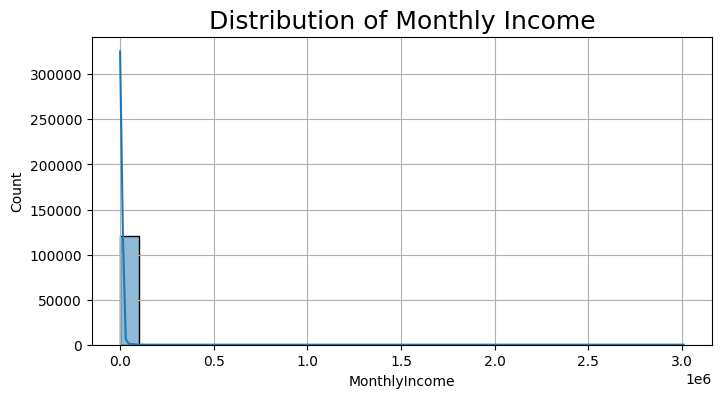

In [18]:
plt.figure(figsize=(8,4))
sns.histplot(data['MonthlyIncome'], bins = 30, kde=True)
plt.title('Distribution of Monthly Income', size=18)
plt.grid(True)
plt.show()

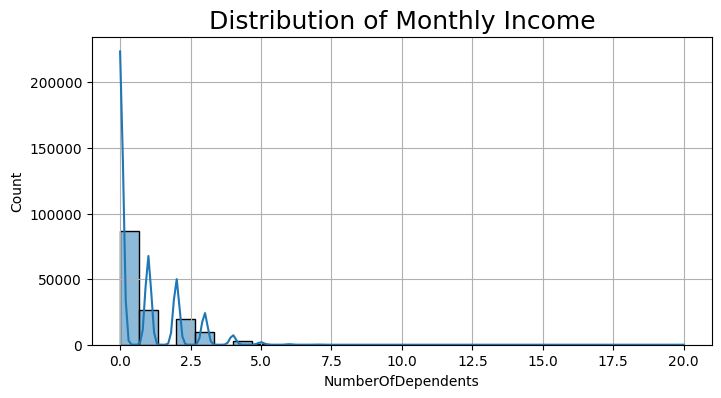

In [42]:
plt.figure(figsize=(8,4))
sns.histplot(data['NumberOfDependents'], bins = 30, kde=True)
plt.title('Distribution of Monthly Income', size=18)
plt.grid(True)
plt.show()

In [19]:
#filling missing values with median as the distribution is not normal
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())
data['NumberOfDependents'] = data['NumberOfDependents'].fillna(data['NumberOfDependents'].median())

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [21]:
data.isna().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [22]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

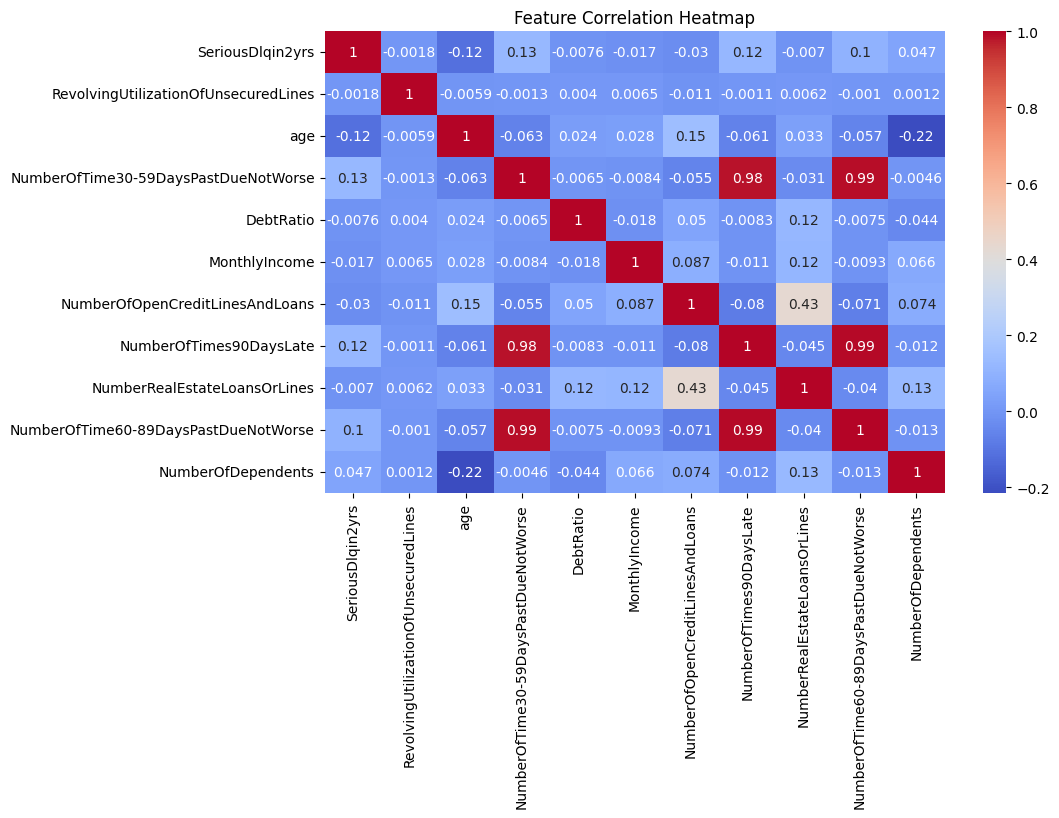

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [24]:
x = data.drop(['SeriousDlqin2yrs'], axis=1)
y = data['SeriousDlqin2yrs']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.head(5)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
104025,0.000000,29,0,0.011513,4342.0,5,0,0,0,0.0
5415,0.595526,55,0,0.835333,1833.0,11,0,1,0,0.0
75612,0.000000,43,0,0.043437,4166.0,2,0,0,0,4.0
138169,0.391980,40,0,0.059771,9000.0,2,0,0,0,5.0
87184,0.000000,35,0,0.133598,5800.0,12,0,1,0,0.0


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [28]:
# Make predictions on the testing data.
y_pred = model.predict(x_test)

In [31]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))
#metrics.accuracy_score()

Test set Accuracy:  0.9350333333333334


In [45]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred,labels=[0, 1])
print(cnf_matrix)


[[27975    69]
 [ 1880    76]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.52      0.04      0.07      1956

    accuracy                           0.94     30000
   macro avg       0.73      0.52      0.52     30000
weighted avg       0.91      0.94      0.91     30000



SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64


<Axes: xlabel='SeriousDlqin2yrs', ylabel='Count'>

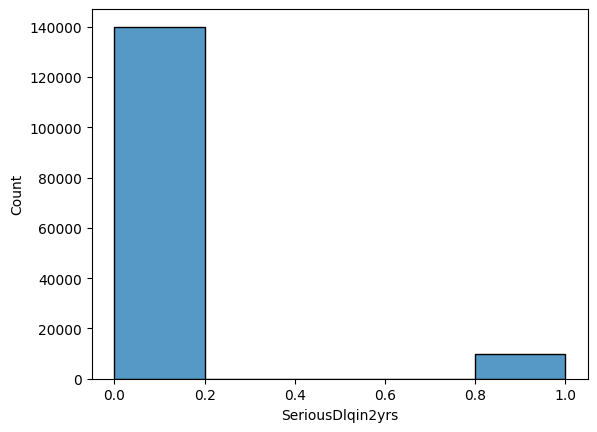

In [34]:
target_count = data["SeriousDlqin2yrs"].value_counts()
print(target_count)
sns.histplot(data["SeriousDlqin2yrs"], bins = 5)

Sol : SMOTE

In [35]:

# check version number
import imblearn
print(imblearn.__version__)

0.13.0


In [37]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [38]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 139974, 1: 10026})


In [ ]:
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(x, y)

In [40]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({1: 139974, 0: 139974})


In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.head(5)

ValueError: Found input variables with inconsistent numbers of samples: [150000, 279948]